# Selecting data based on spatial relationships

When working with geospatial data, you often need to do specific GIS operations based on how the data layers are located in relation to each other. For instance, finding out if a certain point is located inside an area, or whether a line intersects with another line or a polygon, are very common operations for selecting data based on spatial location. These kind of queries are commonly called as {term}`spatial queries`. Spatial queries are conducted based on the {term}`topological spatial relations` which are fundamental constructs that describe how two or more geometric objects relate to each other concerning their position and boundaries. Topological spatial relations can be exemplified by relationships such as *contains*, *touches* and *intersects* ({cite}`Clementini_1994`). In GIS, the topological relations play a crucial role as they enable queries that are less concerned with the exact coordinates or shapes of geographic entities but more focused on their relative arrangements and positions. For instance, regardless of their exact shape or size, a lake *inside* a forest maintains this relationship even if the forest's boundaries or the lake's size change slightly, as long as the lake remains enclosed by the forest. Next, we will learn a bit more details about these topological relations and how to use them for spatial queries in Python.

## Topological spatial relations

Computationally, conducting queries based on topological spatial relations, such as detecting if a point is inside a polygon can be done in different ways, but most GIS software rely on something called {term}`Dimensionally Extended 9-Intersection Model` ([DE-9IM](https://en.wikipedia.org/wiki/DE-9IM) [^DE-9IM]). DE-9IM is an ISO and OGC approved standard and a fundamental framework in GIS that is used to describe and analyze spatial relationships between geometric objects ({cite}`Clementini_1993`). DE-9IM defines the topological relations based on the interior, boundary, and exterior of two geometric shapes and how they intersect with each other (see **Figure 6.31 and Figure 6.32**). When doing this, the DE-9IM also considers the dimensionality of the objects. Considering the dimensionality of geometric objects is important because it determines the nature of spatial relations, influences the complexity of interactions between objects, and defines topological rules. Typically the more dimensions the geometric object has, the more complex the geometry: The Point objects are 0-dimensional, LineString and LinearRing are 1-dimensional and Polygons are 2-dimensional (see Figure **6.31**).   

![_**Figure 6.31**. Interior, boundary and exterior for different geometric data types. The data types can be either 0, 1 or 2-dimensional._](../img/DE-9IM_topology_interior_boundary_exterior.png)

_**Figure 6.31**. Interior, boundary and exterior for different geometric data types. The data types can be either 0, 1 or 2-dimensional._

We do not go into details about the mathematics of the DI-9IM here, but under the hood the model uses a specific 3x3 intersection matrix to examine the intersections of the interior, boundary and exterior of two geometric objects. This makes it possible to produce a detailed characterization of the geometries' spatial relationship and one can for instance test whether a given Point or LineString is *within* a Polygon (returning True or False). When testing how two geometries relate to each other, the DE-9IM model gives a result which is called {term}`spatial predicate` (also called as {term}`binary predicate`). **Figure 6.32** shows eight common spatial predicates based on the spatial relationship between the geometries ({cite}`Egenhofer_1992`). Many of these predicates, such as *intersects*, *within*, *contains*, *overlaps* and *touches* are commonly used when selecting data for specific area of interest or when joining data from one dataset to another based on the spatial relation between the layers. 

![_**Figure 6.32**. Eight common spatial predicates formed based on spatial relations between two geometries. Modified after Egenhofer et al. (1992)_.](../img/spatial-relations.png)

_**Figure 6.32**. Eight common spatial predicates formed based on spatial relations between two Polygon geometries. Modified after Egenhofer et al. (1992)._

The top row of **Figure 6.32** shows spatial predicates in which the geometries A and B are clearly disjoint from each other, contained or within each other, or identical to each other. When the geometries have at least one point in common, the geometries are said to be *intersecting* with each other. Thus, in this figure, all the comparisons except the first one (disjoint) are True, i.e. the geometries *intersect* with each other. The bottom row shows examples of spatial relationships that are slightly "special cases" in one way or another. When two geometries *touch* each other, they have at least one point in common (at the border in this case), but their interiors do not intersect with each other. When the interiors of the geometries A and B are partially on top of each other and partially outside of each other, the geometries are *overlapping* with each other. The spatial predicate for *covers* is when the interior of geometry B is almost totally within A, but they share at least one common coordinate at the border. Similarly, if geometry A is almost totally contained by the geometry B (except at least one common coordinate at the border) the spatial predicate is called *covered by*. These eight examples represent some of the common spatial predicates based on two Polygon shapes. When other shapes are considered (e.g. Points, LineStrings), there are plenty of more topological relations: altogether 512 with 2D data.

## Making spatial queries in Python

Now as we know the basics of topological spatial relations, we can proceed and see how to make such spatial queries using Python. Luckily, we do not need to worry about the exact DE-9IM implementation ourselves, as these operations are already implemented to shapely and geopandas. With these libraries, we can evaluate the topological relationship between geographical objects easily and efficiently. In Python, all the basic spatial predicates listed in **Figure 6.32** are available from shapely library, including:
 
 - `.intersects()`
 - `.within()`
 - `.contains()`
 - `.overlaps()`
 - `.touches()`
 - `.covers()`
 - `.covered_by()`
 - `.equals()`
 - `.disjoint()`
 - `.crosses()`

When you want to use Python to find out how two geometric objects are related to each other topologically, you start by creating the geometries using shapely library. In the following, we create a couple of `Point` objects and one `Polygon` object which we can use to test how they relate to each other: 

In [1]:
from shapely import Point, Polygon

# Create Point objects
point1 = Point(24.952242, 60.1696017)
point2 = Point(24.976567, 60.1612500)

# Create a Polygon
coordinates = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990),
]
polygon = Polygon(coordinates)

We can check the contents of the new variables by printing them to the screen, for example, in which case we would see

```python
print(point1)
print(point2)
print(polygon)
```

```
POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950...
```

If you want to test whether these `Point` geometries stored in `point1` and `point2` are within the `polygon`, you can call the `.within()` method as follows:

In [2]:
point1.within(polygon)

True

In [3]:
point2.within(polygon)

False

As we can see, the first point seem to be located within the polygon where as the second one isn't.

One of the most common spatial queries is to see if a geometry intersects or touches another one. Again, there are binary operations in shapely for checking these spatial relationships:

- `.intersects()` - Two objects intersect if the boundary or interior of one object intersect in any way with the boundary or interior of the other object.
- `.touches()` - Two objects touch if the objects have at least one point in common and their interiors do not intersect with any part of the other object.
   
Let's try these by creating two `LineString` geometries and test whether they intersect and touch each other:

In [4]:
from shapely import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [5]:
line_a.intersects(line_b)

True

In [6]:
line_a.touches(line_b)

True

As we can see, it seems that our two `LineString` objects are both intersecting and touching each other. We can confirm this by plotting the features together as a `MultiLineString`:

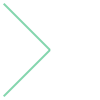

In [7]:
# Create a MultiLineString from line_a and line_b
multi_line = MultiLineString([line_a, line_b])
multi_line

_**Figure 6.33**. Two LineStrings that both intersect and touch each other._

As we can see, the lines `.touch()` each other because `line_b` continues from the same node ( (1,1) ) where the `line_a` ends.
However, if the lines are fully overlapping with each other they don't touch due to the spatial relationship rule in the DE-9IM. We can confirm this by checking if `line_a` touches itself:

In [8]:
line_a.touches(line_a)

False

No it doesn't. However, `.intersects()` and `.equals()` should produce `True` for a case when we compare the `line_a` with itself:

In [9]:
print("Intersects?", line_a.intersects(line_a))
print("Equals?", line_a.equals(line_a))

Intersects? True
Equals? True


#### Question 6.8

Use python to prove that `line_a` and `line_b` are not identical.

In [10]:
# Use this cell to enter your solution.

In [11]:
# Solution

print("Line a is equal to line b: ", line_a.equals(line_b))

Line a is equal to line b:  False


Following the syntax from the previous examples, we can test all different spatial predicates and assess the spatial relationship between geometries. The following prints results for all predicates between the `point1` and the `polygon` which we created earlier: 

In [12]:
print("Intersects?", point1.intersects(polygon))
print("Within?", point1.within(polygon))
print("Contains?", point1.contains(polygon))
print("Overlaps?", point1.overlaps(polygon))
print("Touches?", point1.touches(polygon))
print("Covers?", point1.covers(polygon))
print("Covered by?", point1.covered_by(polygon))
print("Equals?", point1.equals(polygon))
print("Disjoint?", point1.disjoint(polygon))
print("Crosses?", point1.crosses(polygon))

Intersects? True
Within? True
Contains? False
Overlaps? False
Touches? False
Covers? False
Covered by? True
Equals? False
Disjoint? False
Crosses? False


Looking at all the spatial predicates, we can see that the spatial relationship between our point and polygon object produces three `True` values: The point and polygon intersect with each other, the point is within the polygon, and the point is covered by the polygon. All the other tests correctly produce `False`, which matches with the logic of the `DE-9IM` standard. 

It is good to notice that some of these spatial predicates are closely related to each other. For example, the `.within()` and `covered_by()` in our tests produce similar result. Also, `.contains()` is closely related to `within()`. Our `point1` was within the `polygon`, but we can also say that the `polygon` contains `point1`. Hence, both tests produce the same result, but the logic for the relationship is inverse. Which one should you use then? Well, it depends on the situation: 

-  if you have many points and just one polygon and you try to find out which one of them is inside the polygon: You might need to check the separately for each point to see which one is `.within()` the polygon.
-  if you have many polygons and just one point and you want to find out which polygon contains the point: You might need to check separately for each polygon to see which one(s) `.contains()` the point.

## Spatial queries using geopandas

Now as we have learned how to investigate the spatial relationships between shapely geometries, we can continue and learn how to conduct spatial queries with geopandas `GeoDataFrames`. Conducting spatial queries with geopandas is handy because you can easily compare the spatial relationships between multiple geometries stored in separate `GeoDataFrames`. Next, we will run an example in which we check which points are located within specific areas of Helsinki. Let's start by reading data that contains Polygons for major districts in Helsinki Region, as well as a few point observations that represent addresses around Helsinki that we geocoded in the previous section:

In [13]:
import geopandas as gpd

points = gpd.read_file("data/Helsinki/addresses.shp")
districts = gpd.read_file("data/Helsinki/Major_districts.gpkg")

In [14]:
print("Shape:", points.shape)
print(points.head())

Shape: (34, 4)
                                             address    id  \
0  Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...  1000   
1  1, Kampinkuja, Kamppi, Eteläinen suurpiiri, He...  1001   
2  Espresso House, 8, Kaivokatu, Keskusta, Kluuvi...  1002   
3  Hermannin rantatie, Verkkosaari, Kalasatama, S...  1003   
4  9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...  1005   

                                            addr                   geometry  
0       Itämerenkatu 14, 00101 Helsinki, Finland   POINT (24.91556 60.1632)  
1          Kampinkuja 1, 00100 Helsinki, Finland  POINT (24.93009 60.16846)  
2           Kaivokatu 8, 00101 Helsinki, Finland  POINT (24.94153 60.17016)  
3  Hermannin rantatie 1, 00580 Helsinki, Finland   POINT (24.9787 60.19093)  
4     Tyynenmerenkatu 9, 00220 Helsinki, Finland    POINT (24.9216 60.1565)  


In [15]:
print("Shape:", districts.shape)
print(districts.tail(5))

Shape: (23, 3)
           Name Description                                           geometry
18    Koivukylä              POLYGON Z ((24.99423 60.33296 0, 25.00007 60.3...
19      Itäinen              POLYGON Z ((25.03517 60.23627 0, 25.03585 60.2...
20  Östersundom              POLYGON Z ((25.23352 60.25655 0, 25.23744 60.2...
21     Hakunila              POLYGON Z ((25.08472 60.27248 0, 25.08492 60.2...
22        Korso              POLYGON Z ((25.1238 60.34191 0, 25.11997 60.34...


The data contains 34 address points and 23 district polygons. For demonstration purposes, we are interested in finding all points that are within two areas in Helsinki region, namely `Itäinen` and `Eteläinen` (*'Eastern'* and *'Southern'* in English). Let's first select the districts using the `.loc` indexer and the listed criteria which we can use with the `.isin()` method to filter the data, as we learned already in Chapter 3:

In [16]:
selection = districts.loc[districts["Name"].isin(["Itäinen", "Eteläinen"])]
print(selection.head())

         Name Description                                           geometry
10  Eteläinen              POLYGON Z ((24.78277 60.09997 0, 24.81973 60.1...
19    Itäinen              POLYGON Z ((25.03517 60.23627 0, 25.03585 60.2...


Let's now plot the layers on top of each other. The areas with red color represent the districts that we want to use for testing the spatial relationships against the point layer (shown with blue color):

<Axes: >

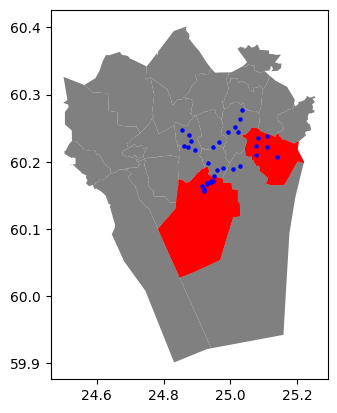

In [17]:
base = districts.plot(facecolor="gray")
selection.plot(ax=base, facecolor="red")
points.plot(ax=base, color="blue", markersize=5)

_**Figure 6.34**. A map of Points and the two Polygon objects (in red) which we want to use for making the selection._

As we can see from **Figure 6.34**, many points seem to be within the two selected districts. To find out which of of them are located within the Polygon, we need to conduct a Point in Polygon -query. We can do this by checking which Points in the `points` GeoDataFrame are `.within()` the selected polygons stored in the `selection` GeoDataFrame. Notice that we convert the Polygons into a single `MultiPolygon` by conducting a {term}`unary union` based on the geometries in the `selection` GeoDataFrame. As a result, we get a Series that contains Boolean values (True or False) corresponding to each Point object in the `points` GeoDataFrame:

In [18]:
pip_mask = points.within(selection.unary_union)
print(pip_mask)

0      True
1      True
2      True
3     False
4      True
5      True
6      True
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23     True
24     True
25     True
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
dtype: bool


/var/folders/f7/rhmqxfmx40s4yv9bhh7skq4m0000gp/T/ipykernel_66951/2303775877.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  pip_mask = points.within(selection.unary_union)


As as result, we get `True` if the given point is inside the selected Polygons, and `False` if it is not. We can now use this mask array to select the points that are inside the given polygons. Selecting data with this kind of mask array (containing boolean values) is easy by passing the array inside the `loc` indexer:

In [19]:
pip_data = points.loc[pip_mask]
print(pip_data)

                                              address    id  \
0   Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...  1000   
1   1, Kampinkuja, Kamppi, Eteläinen suurpiiri, He...  1001   
2   Espresso House, 8, Kaivokatu, Keskusta, Kluuvi...  1002   
4   9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...  1005   
5   18, Kontulantie, Kontula, Mellunkylä, Itäinen ...  1006   
6   Itäväylä, Vartioharju, Vartiokylä, Itäinen suu...  1007   
10  Rautatientori, Keskusta, Kluuvi, Eteläinen suu...  1011   
22  1, Tallinnanaukio, Itäkeskus, Vartiokylä, Itäi...  1023   
23  Tyynylaavantie, Keski-Vuosaari, Vuosaari, Itäi...  1024   
24  Myllypurontie, Myllypuro, Vartiokylä, Itäinen ...  1025   
25  Mellunmäenraitio, Mellunmäki, Mellunkylä, Itäi...  1026   
30  Kampin keskus, 1, Urho Kekkosen katu, Kamppi, ...  1031   
31  Ruoholahdenkatu, Kamppi, Eteläinen suurpiiri, ...  1032   
32  3, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...  1033   
33  Oluthuone Kaisla, 4, Vilhonkatu, Kaisaniemi, K...  

Let's finally confirm that our Point in Polygon query worked as it should by plotting the points that are within the southern district:

<Axes: >

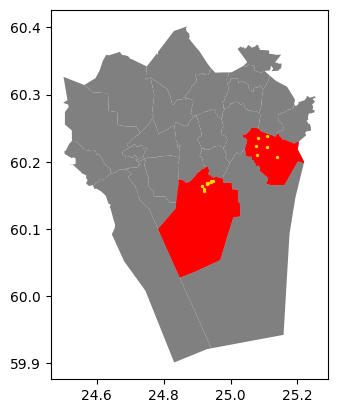

In [20]:
# Plot polygons
ax = districts.plot(facecolor="gray")
selection.plot(ax=ax, facecolor="red")

# Plot points
pip_data.plot(ax=ax, color="gold", markersize=2)

_**Figure 6.35**. A map showing the Points that were selected as they were within the red Polygons._

Perfect! Now we only have the (golden) points that, indeed, are inside the red polygons which is exactly what we wanted. However, why did we use the unary union when doing the `.within()` query, you might wonder? The reason for using `selection.unary_union` is that it creates a single `shapely.MultiPolygon` object out of all geometries in the `selection` GeoDataFrame, and hence makes the spatial query to consider all geometries in the `selection` GeoDataFrame. Without the unary union, the comparisons would be conducted between two `GeoSeries` at row-by-row basis producing most likely unwanted results: the geometry of the first row in the left GeoDataFrame would be compared against the geometry in the first row in the other GeoDataFrame accordingly. Hence, when you want to find out for example "which points in the left GeoDataFrame are within all polygons in the right GeoDataFrame", it is recommended to use the `.unary_union`, or some other geometric operation to combine all geometries of the right GeoDataFrame into a single shapely geometry. This is true not only for polygons, but applies similarly to all geometry types. 

## Efficient spatial queries using `.sjoin()`

In the previous section, we used the more "traditional" GeoDataFrame methods for spatial predicates (`.within()`, `.contains()` etc.) to see how two spatial data layers relate with each other. In the following, we will show how to take advantage of a method called `.sjoin()` for doing spatial queries between two GeoDataFrames. Normally, `.sjoin()` method is used for conducting a {term}`spatial join` between two spatial datasets, meaning that specific attribute information from a given GeoDataFrame is joined to the other one based on their topological relationship (see Chapter 6.7 for more details). However, spatial join can also be used as an efficient way to conduct spatial queries between two GeoDataFrames, producing similar results as when using the normal shapely spatial predicates. Consider the following example:  

In [21]:
selected_points = points.sjoin(selection.geometry.to_frame())

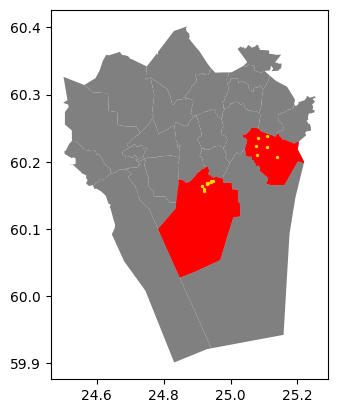

In [22]:
ax = districts.plot(facecolor="gray")
ax = selection.plot(ax=ax, facecolor="red")
ax = selected_points.plot(ax=ax, color="gold", markersize=2)

_**Figure 6.36**. Selecting Points within red Polygons using spatial join technique._

As we can see, the `.sjoin()` method here (Figure **6.36**) produces exactly the same results as in the previous example (Figure **6.35**). Notice how we used the `selection.geometry.to_frame()` when calling the `sjoin()` method. This is a special trick to avoid attaching any extra attributes from the `selection` GeoDataFrame to our data, which is what `sjoin()` method would normally do (and which it is actually designed for). As we are only interested in the geometries of the right-hand-side layer to do the selection, calling the `.geometry.to_frame()` will first select the geometry column from the `selection` layer and then converts it into a GeoDataFrame (which would otherwise be a GeoSeries). An alternative approach for doing the same thing is to use `selection[["geometry"]]`, which however assumes that your active geometries are stored in column `"geometry"` (which typically is the case, but not necessary always).

In a similar manner, we can easily use the `.sjoin()` with the parameter `predicate` to make selections based on how the geometries between two GeoDataFrames are related to each other. By default, the `sjoin()` uses `"intersects"` as a spatial predicate, but it is easy to change this. For example, we can investigate which of the districts *contain* at least one point. In this case, we make a spatial join using the `disctricts` GeoDataFrame as a starting point, join the layer with the `points` and use the `"contains"` as a value to our `predicate` parameter:

In [23]:
districts_with_points = districts.sjoin(
    points.geometry.to_frame(), predicate="contains"
)

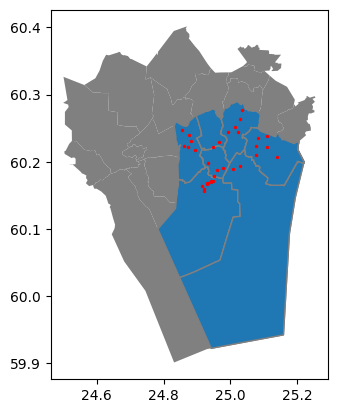

In [24]:
ax = districts.plot(facecolor="gray")
ax = districts_with_points.plot(ax=ax, edgecolor="gray")
ax = points.plot(ax=ax, color="red", markersize=2)

_**Figure 6.37**. Polygons that contain at least one Point object._

As a result, we can now see that all the polygons marked with blue color were correctly selected as those ones which contain at least one point object. One important thing to remember whenever making spatial queries is that both layers need to share the same Coordinate Reference System for the selection to work properly. A typical reason for getting incorrect results when selecting data (likely an empty GeoDataFrame) is that one data layer is e.g. in WGS84 coordinate reference system whereas the other one is in some projected CRS, such as ETRS-LAEA. If this happens, you can easily fix the situation by defining and reprojecting both GeoDataFrames to same CRS using the `to_crs()` method (see Chapter 6.4).  

Following the previous examples, you can easily test other topological relationships as well, by changing the value in `predicate` parameter. To find all possible spatial predicates for a given GeoDataFrame you can call:

In [25]:
districts.sindex.valid_query_predicates

{None,
 'contains',
 'contains_properly',
 'covered_by',
 'covers',
 'crosses',
 'dwithin',
 'intersects',
 'overlaps',
 'touches',
 'within'}

As you can see, this list includes all typical spatial predicates which we covered earlier. But what is this `.sindex` that we use here? Let's investigate it a bit further: 

In [26]:
districts.sindex

As we can see, the `.sindex` is something called `PyGEOSSSTRTreeIndex` object. This is something that geopandas prepares automatically for GeoDataFrames and it contains the {term}`spatial index` for our data. A spatial index is a special data structure that allows for efficient querying of spatial data. There are many different kind of spatial indices, but geopandas uses a spatial index called R-tree which is a hierarchical, tree-like structure that divides the space into nested, overlapping rectangles and indexes the bounding boxes of each geometry. The spatial index improves the performance of spatial queries, such as finding all objects that intersect with a given area. The `.sjoin()` method takes advantage of the spatial index and is therefore an extremely powerful and makes the queries faster (see Appendix 5 for further details). This comes very practical especially when working with large datasets and doing e.g. a point-in-polygon type of queries with millions of point observations. Hence, when selecting data based on topological relations, we recommend using `.sjoin()` instead of directly calling `.within()`, `.contains()` or other predicates as we saw previously. 

#### Question 6.9

How many addresses are located in each district? You can find out the answer by grouping the spatial join result based the district name (see Part I, chapter 3 for a reminder on how to group and aggregate data). 

In [27]:
# Use this cell to enter your solution.

In [28]:
# Solution

# Check column names in the spatial join result
print(districts_with_points.columns.values)

# Group by district name
grouped = districts_with_points.groupby("Name")

# Count the number of rows (adress locations) in each district
grouped.index_right.count()

['Name' 'Description' 'geometry' 'index_right']


Name
Eteläinen     9
Itäinen       6
Kaakkoinen    2
Keskinen      4
Koillinen     5
Läntinen      6
Pohjoinen     2
Name: index_right, dtype: int64

## Footnotes

[^DE-9IM]: <https://en.wikipedia.org/wiki/DE-9IM>